# Pasta Classifier

## Getting the data

In [5]:
import matplotlib.pyplot as plt 
import os
from pathlib import Path
from PIL.ImageOps import crop
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # asking PIL to be tolerant of truncated images 
import random
import shutil
from tqdm.auto import tqdm
from utils import (
    clean_images, 
    remove_duplicates,
    resize_image,
    cropping_image,
    image_grid,
    yellowness_img
)

In [9]:
#Downloading online images 
from simple_image_download import simple_image_download as simp 
response = simp.simple_image_download
lst=[
   'conchiglioni',
   'farfalle',
   'fettuccine',
   'fusilli',
   'gnocchi',
   'lasagne',
   'linguine',
   'orecchiette',
   'penne',
   'rigatoni',
   'spaghetti', 
   'tagliatelle', 
]
for rep in lst:
   response().download(rep + ' raw pasta', 70)

HTTPSConnectionPool(host='www.stjameswinery.com', port=443): Max retries exceeded with url: /wp-content/uploads/2015/04/farfalle-495747_1920.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))
HTTPSConnectionPool(host='www.debriar.co.uk', port=443): Max retries exceeded with url: /uploads/images/zoom/linguine_cheap.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))


In [10]:
# Setting the minimum size of the image 
min_img_size = 640

In [11]:
# Cleaning images
main_dir = Path("simple_images")
clean_images(main_dir, min_img_size) 

{'files_remaning': 463, 'files_deleted': 377}

In [12]:
# Removing duplicates
remove_duplicates(main_dir)

{'files_remaning': 455, 'files_deleted': 8}

In [13]:
# Resizing and cropping the images 
main_dir = Path('simple_images')

# Iterating through each pasta shape's folder 
for child_dir in main_dir.iterdir():
    if (child_dir / '.ipynb_checkpoints').is_dir():
        shutil.rmtree(child_dir / '.ipynb_checkpoints')

    # Iterating through each file path in each pasta shape's folder 
    for file_path in child_dir.iterdir():
        img = Image.open(file_path)
        img = resize_image(img, 320) # resizing the images
        img = cropping_image(img, 320) # cropping the images 
        if img.mode != 'RGB': 
            img = img.convert('RGB') # converting images to RGB mode 
        img.save(file_path) # saving the new image to the file path 

In [49]:
# Storing images' file paths into a dictionary of pasta shapes 
pasta_dict = {} 
for child_dir in main_dir.iterdir():
    if (child_dir / '.ipynb_checkpoints').is_dir():
        shutil.rmtree(child_dir / '.ipynb_checkpoints')

    # Setting the shape of the pasta as key in the dictionary 
    pasta_shape = child_dir.parts[-1]

    # Setting the list of pasta shape's images as value in the dictionary 
    pasta_dict[pasta_shape] = [] 

    for file_path in child_dir.iterdir():
        img = Image.open(file_path)
        pasta_dict[pasta_shape].append(img) # appending the image in the list in the dictionary 

In [118]:
# Creating a grid of pasta images for each shape 
num_cols = 5
grid_dict = {}

for label, img_list in pasta_dict.items():
    num_rows = len(img_list) // num_cols # rounding the lists' lengths with the // sign 
    grid_dict[label] = image_grid(img_list[:num_rows*num_cols], rows=num_rows, cols=num_cols)

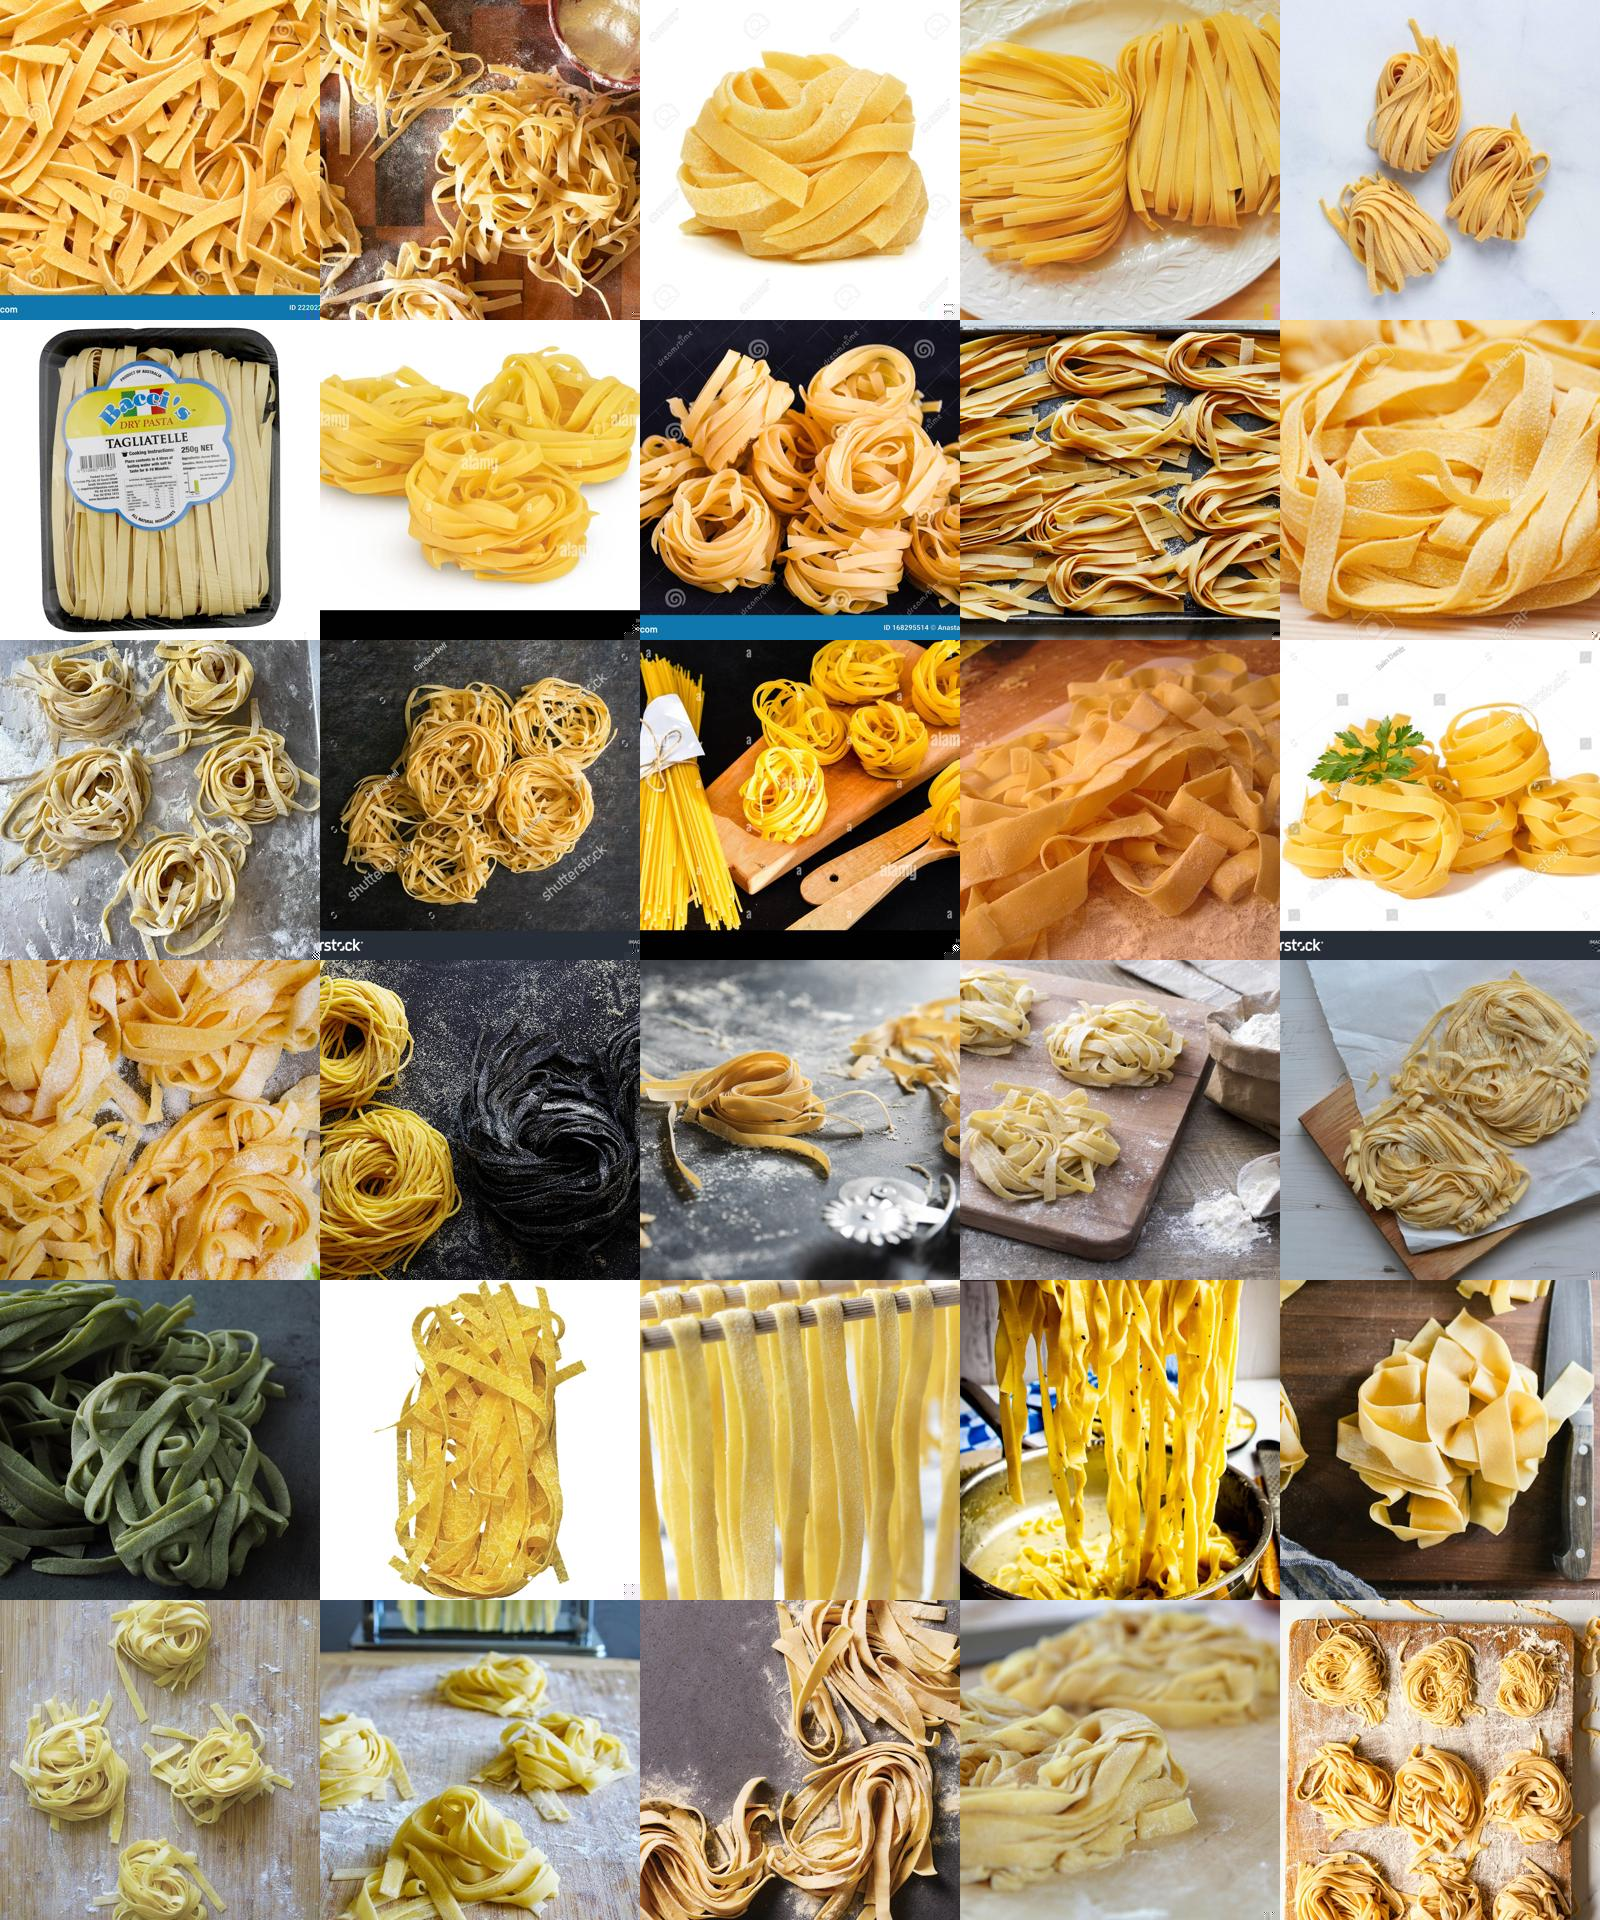

In [142]:
# Displaying images to check that we have good pics 
grid_dict['tagliatelle raw pasta']